## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
data_combined['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmice = data_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
dupmicedf = data_combined[dupmice]
dupmicedf.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = data_combined.drop([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])
pd.set_option('display.max_rows', None)
cleandata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleandata['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tmean = cleandata.groupby('Drug Regimen').mean()
tmedian = cleandata.groupby('Drug Regimen').median()
tvar = cleandata.groupby('Drug Regimen').var()
tstd = cleandata.groupby('Drug Regimen').std()
tsem = cleandata.groupby('Drug Regimen').sem()

tstats_df = pd.DataFrame({"Average Tumor Volume": tmean['Tumor Volume (mm3)'], "Median Tumor Volume": tmedian['Tumor Volume (mm3)'], "Tumor Volume Variance": tvar['Tumor Volume (mm3)'], "Tumor Std Dev": tstd['Tumor Volume (mm3)'], "Tumor SEM": tsem['Tumor Volume (mm3)']})
tstats_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tstats_df
# Using the aggregation method, produce the same summary statistics in a single line
tstataggregate = cleandata.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
tstataggregate["Tumor Volume (mm3)"]



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice')

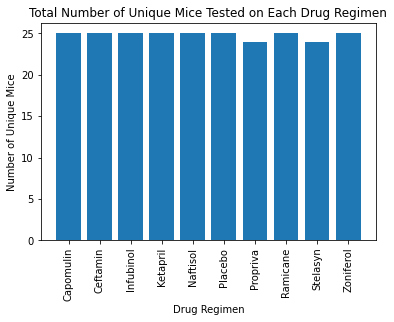

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugmice = cleandata.groupby(["Drug Regimen"])
countmice = drugmice['Mouse ID'].unique()

miceregi = []
for i in countmice:
    miceregi.append(len(i))
    
regimen_df = pd.DataFrame({"Drug Regimen": countmice.index, "Number of Mice": miceregi})

plt.bar(regimen_df["Drug Regimen"], regimen_df["Number of Mice"], align='center')
tick_locations = [value for value in regimen_df["Drug Regimen"]]
plt.xticks(tick_locations,regimen_df["Drug Regimen"], rotation='vertical')
plt.title("Total Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")                   


Text(0, 0.5, 'Number of Mice')

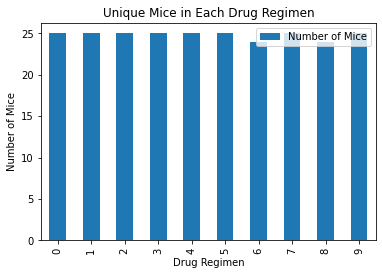

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugplot = regimen_df.plot(kind='bar', title='Unique Mice in Each Drug Regimen')
drugplot.set_xlabel("Drug Regimen")
drugplot.set_ylabel("Number of Mice")


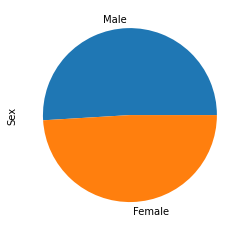

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleandata['Sex'].value_counts().plot(kind='pie')

(-1.1097080975813773,
 1.100462290361018,
 -1.1129091579915955,
 1.2090725214168956)

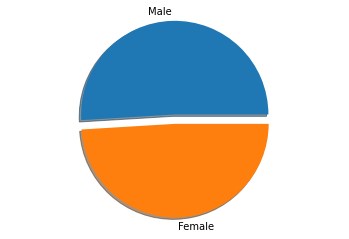

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexdata = cleandata['Sex'].value_counts()
explode = (0.1,0)
labels = ['Male', 'Female']

fig1, ax1 = plt.subplots()
ax1.pie(sexdata, explode=explode, labels=labels, shadow=True )
ax1.axis('equal')

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints= cleandata.loc[(cleandata["Timepoint"] == 45)]
timepoints

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timetumor = pd.merge(cleandata, timepoints, how='inner')
timetumor.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
countmice = timetumor['Mouse ID'].unique()
voltum = []
for i in countmice:
    voltum.append(len(i))
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumorvolume = timetumor['Tumor Volume (mm3)']
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"IQR: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
drugtype = timetumor.groupby("Drug Regimen")
micetype = drugtype['Tumor Volume (mm3)'].mean() 
micetype    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
print(f"Lower Bound: {lowerbound}")
print(f"Upper Bound: {upperbound}")
print("Outliers unlikely")
micetype    

IQR: 28.211951665000008
Lower Bound: -1.6595831850000096
Upper Bound: 111.18822347500002
Outliers unlikely


Drug Regimen
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: Tumor Volume (mm3), dtype: float64

C:\Users\rvara\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Drug Regimen')

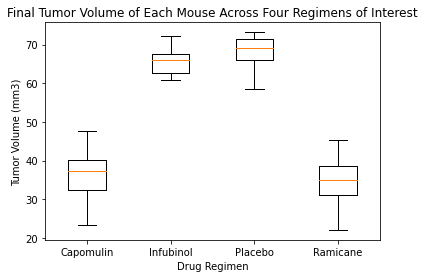

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
micetumor = timetumor["Tumor Volume (mm3)"]
capomulin = micetumor.loc[(timetumor["Drug Regimen"] == 'Capomulin')]
infubinol = micetumor.loc[(timetumor["Drug Regimen"] == 'Infubinol')]
placebo = micetumor.loc[(timetumor["Drug Regimen"] == 'Placebo')]
ramicane = micetumor.loc[(timetumor["Drug Regimen"] == 'Ramicane')]

ax1.boxplot([capomulin, infubinol, placebo, ramicane])
plt.xticks([1,2,3,4],['Capomulin', 'Infubinol', 'Placebo', 'Ramicane'])
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")


## Line and Scatter Plots

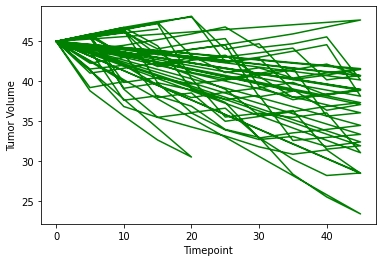

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorgroup = cleandata.groupby("Drug Regimen")
tumorvolume = tumorgroup['Tumor Volume (mm3)']
drugtype = cleandata.loc[(cleandata["Drug Regimen"] == 'Capomulin')]
captumvol = drugtype['Tumor Volume (mm3)']
captime = drugtype['Timepoint']

lineplot = plt.plot(captime, captumvol, color="green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drugtype = cleandata.loc[(cleandata["Drug Regimen"] == 'Capomulin')]
captumvol = drugtype['Tumor Volume (mm3)']
mouseweight = drugtype['Weight (g)']

plt.scatter(mouseweight, captumvol, c=mouseweight)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")
clb =plt.colorbar()
clb.set_label("Mouse Weight")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(captumvol,mouseweight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


Text(0, 0.5, 'Tumor Volume (mm3)')

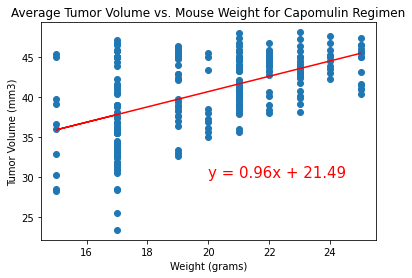

In [23]:
#lin reg

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseweight, captumvol)
regress_values = mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseweight, captumvol)
plt.plot(mouseweight,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")